In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

#Load data

In [2]:
df = pd.read_csv('/Users/alfahwun/Downloads/eda_data.csv')

# Data visualisation

In [3]:
df.shape

(742, 33)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
columnsScatter = ['Rating','Type of ownership','Age','job_title_sim', 'Degree']

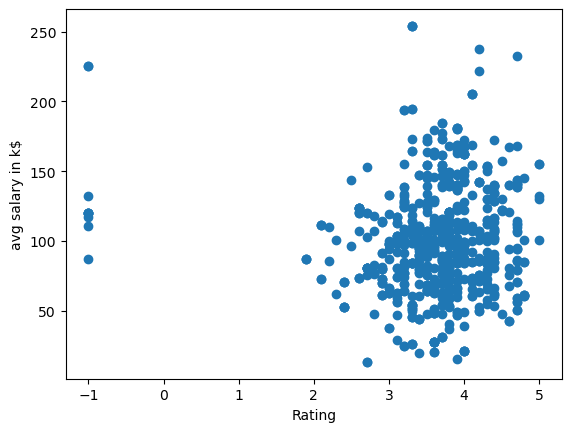

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=df[columnsScatter[0]],y=df['avg_salary'])
plt.xlabel('Rating')
plt.ylabel('avg salary in k$')
plt.show()

<BarContainer object of 742 artists>

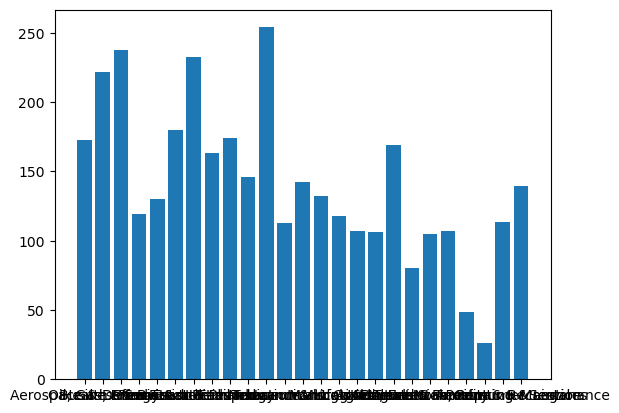

In [7]:
plt.bar(df['Sector'], df['avg_salary'])

In [8]:
df["Sum_ab"]=df.iloc[:1,23:39].sum(axis=1)

In [9]:
abilities = []
for i in  range(df.shape[0]) :
  abilities.append(str(df.iloc[i:i+1,23:39].sum(axis=1)).split(' ')[-2][0])
abilities
df["Sum_ab"]=abilities
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp,Sum_ab
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,1,0,0,0,1,data scientist,na,2536,0,5
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,1,0,0,0,0,data scientist,na,4783,0,4
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,0,1,0,1,data scientist,na,3461,0,3
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,1,0,0,0,0,data scientist,na,3883,3,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,0,0,0,1,data scientist,na,2728,3,2


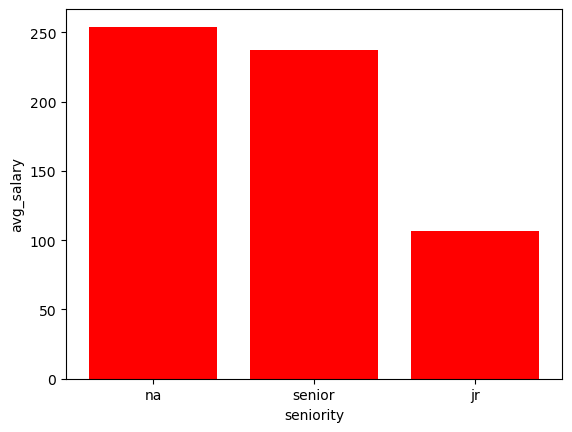

In [10]:
plt.bar(df['seniority'], df['avg_salary'],color='red')
plt.xlabel('seniority')
plt.ylabel('avg_salary')
plt.show()

In [11]:
#df = df.drop(columns=["Job Description",'Location',"Company Name","Founded","Industry","Salary Estimate",'Job Title','company_txt','hourly','employer_provided',"Unnamed: 0",'Competitors', 'Headquarters','Revenue','Size','Type of ownership','Sector'],axis=1)

In [12]:
df1 = df[['Rating','avg_salary','same_state', 'age',  'job_simp', 'seniority','num_comp', 'Sum_ab']]

In [13]:
df1.columns

Index(['Rating', 'avg_salary', 'same_state', 'age', 'job_simp', 'seniority',
       'num_comp', 'Sum_ab'],
      dtype='object')

In [15]:
df1.head()

,Rating,avg_salary,same_state,age,job_simp,seniority,num_comp,Sum_ab
0,3.8,72.0,0,47,data scientist,na,0,5
1,3.4,87.5,0,36,data scientist,na,0,4
2,4.8,85.0,1,10,data scientist,na,0,3
3,3.8,76.5,1,55,data scientist,na,3,3
4,2.9,114.5,1,22,data scientist,na,3,2


In [16]:
df1['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

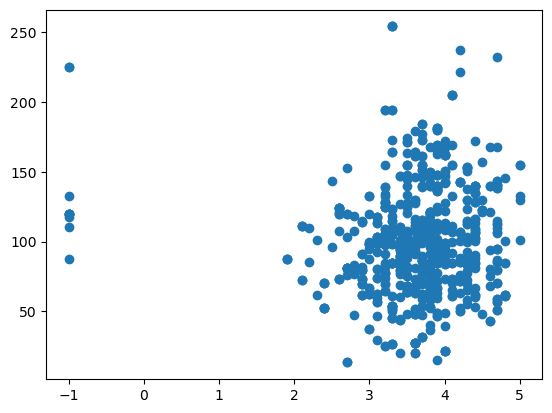

In [17]:
plt.scatter(df1.Rating,df1.avg_salary)

In [19]:
#% datascience with  no degree
df1['seniority'].loc[df1['job_simp']=='data scientist'].value_counts()['na']/df1['job_simp'].value_counts()['data scientist']

0.6666666666666666

In [20]:
df1['job_simp'].value_counts()['data scientist']

279

In [21]:
df1

,Rating,avg_salary,same_state,age,job_simp,seniority,num_comp,Sum_ab
0,3.8,72.0,0,47,data scientist,na,0,5
1,3.4,87.5,0,36,data scientist,na,0,4
2,4.8,85.0,1,10,data scientist,na,0,3
3,3.8,76.5,1,55,data scientist,na,3,3
4,2.9,114.5,1,22,data scientist,na,3,2
...,...,...,...,...,...,...,...,...
737,3.9,84.5,0,190,na,senior,3,6
738,4.4,102.5,0,14,data engineer,senior,3,6
739,2.6,73.5,1,36,na,na,0,3
740,3.2,127.5,0,-1,manager,na,0,1


In [22]:
df2=df1.copy()

In [23]:
df2

,Rating,avg_salary,same_state,age,job_simp,seniority,num_comp,Sum_ab
0,3.8,72.0,0,47,data scientist,na,0,5
1,3.4,87.5,0,36,data scientist,na,0,4
2,4.8,85.0,1,10,data scientist,na,0,3
3,3.8,76.5,1,55,data scientist,na,3,3
4,2.9,114.5,1,22,data scientist,na,3,2
...,...,...,...,...,...,...,...,...
737,3.9,84.5,0,190,na,senior,3,6
738,4.4,102.5,0,14,data engineer,senior,3,6
739,2.6,73.5,1,36,na,na,0,3
740,3.2,127.5,0,-1,manager,na,0,1


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
def feature_encoder(*labels):
  for label in labels:
    df1[label] = encoder.fit_transform(df1[label])
    print(f"{label} is encoded.")

In [25]:
df1.select_dtypes(include='object').columns

Index(['job_simp', 'seniority', 'Sum_ab'], dtype='object')

In [26]:
feature_encoder('seniority')

seniority is encoded.


In [27]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def encode_categorical_columns(df, categorical_cols):
    encoder = OneHotEncoder()
    encoder.fit(df[categorical_cols])
    transformed_data = encoder.transform(df[categorical_cols]).toarray()
    encoded_cols = []
    for i, category in enumerate(encoder.categories_):
        encoded_cols.extend(categorical_cols[i] + '_' + value for value in category)
    encoded_df = pd.DataFrame(transformed_data, columns=encoded_cols)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(columns=categorical_cols, inplace=True)
    return df


In [28]:
df1 = encode_categorical_columns(df1,['job_simp'])

In [29]:
df1.head()

,Rating,avg_salary,same_state,age,seniority,num_comp,Sum_ab,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na
0,3.8,72.0,0,47,1,0,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.4,87.5,0,36,1,0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.8,85.0,1,10,1,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.8,76.5,1,55,1,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.9,114.5,1,22,1,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
df1 = df1.astype(float)

# Partie deux  : Clustering 



1- Recherche du meilleur nombre clusteurs avec elbow methode

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
#X = df1.drop('avg_salary',axis=1)
X = df1

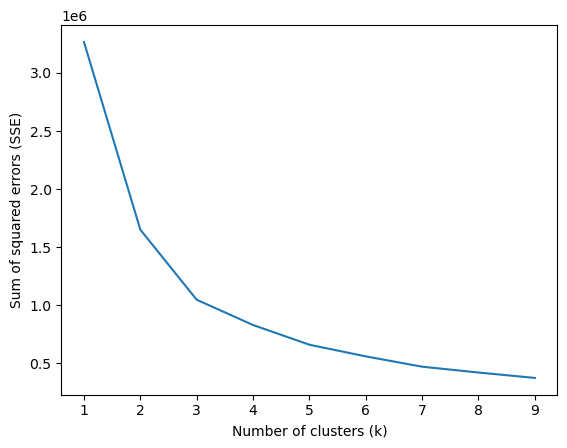

In [33]:
#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#create dataset
#initialize lists for storing SSE values
sse = []
k_values = []

#loop through different values of k
for k in range(1, 10):
    #initialize KMeans
    kmeans = KMeans(n_clusters=k)
    #fit KMeans
    kmeans.fit(X)
    #compute SSE
    sse_value = kmeans.inertia_
    #append SSE and k values to lists
    sse.append(sse_value)
    k_values.append(k)

#plot SSE values
plt.plot(k_values, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()


2- deduire le meilleure K avec la methode silhoutte analysis 

In [36]:
# import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# create a range of K values
k_range = range(3, 10)

# create a list to store silhouette scores
silhouette_scores = []

# loop through each K value
for k in k_range:

    # Initialize a KMeans model and fit it to the data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # Calculate the Silhouette Score
    silhouette_score_k = silhouette_score(X, kmeans.labels_)

    # append the Silhouette Score to the list
    silhouette_scores.append(silhouette_score_k)

# select the K value with the highest Silhouette Score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print('The best K value is:', best_k)

The best K value is: 3


In [37]:
silhouette_scores

[0.41378974197719537,
 0.38170775380272903,
 0.38661025104790303,
 0.38797007642472603,
 0.4003811092990186,
 0.37798264014456945,
 0.36564192004808616]

Plot the silhouette score and the elbow methode for a given grid 

Text(0, 0.5, 'Testing Accuracy')

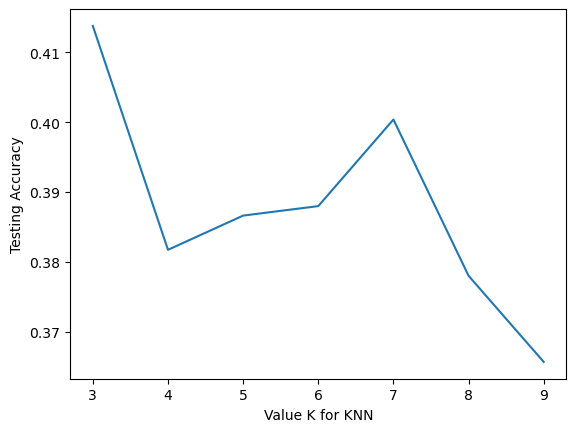

In [39]:
plt.plot(range(3,10),silhouette_scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

3 est la valeur la plus optimal 

In [40]:
kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)
res = pd.Series(kmeans.labels_)

In [41]:
df2['cluster'] = res

In [43]:
df1['cluster'] = res

In [42]:
df2

,Rating,avg_salary,same_state,age,job_simp,seniority,num_comp,Sum_ab,cluster
0,3.8,72.0,0,47,data scientist,na,0,5,0
1,3.4,87.5,0,36,data scientist,na,0,4,0
2,4.8,85.0,1,10,data scientist,na,0,3,0
3,3.8,76.5,1,55,data scientist,na,3,3,0
4,2.9,114.5,1,22,data scientist,na,3,2,2
...,...,...,...,...,...,...,...,...,...
737,3.9,84.5,0,190,na,senior,3,6,1
738,4.4,102.5,0,14,data engineer,senior,3,6,0
739,2.6,73.5,1,36,na,na,0,3,0
740,3.2,127.5,0,-1,manager,na,0,1,2


In [44]:
df2[['avg_salary','cluster']].loc[df['job_simp']=='data scientist'].groupby(['cluster']).mean()

,avg_salary
cluster,
0,88.131313
1,119.355263
2,137.605634


In [45]:
import pickle
pickle.dump(kmeans, open('salary.pkl', 'wb'))

In [46]:
import matplotlib.pyplot as plt

In [47]:
df2['Rating'][df2['cluster']== 1]

14     3.7
19     4.0
25     4.0
27     3.7
28     4.0
      ... 
715    3.1
720    3.7
725    3.1
734    3.6
737    3.9
Name: Rating, Length: 107, dtype: float64

In [48]:
df2['avg_salary'][df2['cluster']== 1]

14     113.5
19      87.5
25      86.5
27      47.5
28      84.0
       ...  
715     99.5
720     54.0
725    117.5
734     68.5
737     84.5
Name: avg_salary, Length: 107, dtype: float64

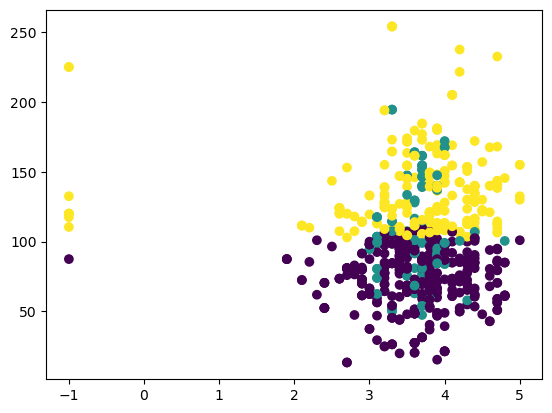

In [49]:
plt.scatter(x=df2.Rating,y=df2.avg_salary,c=df2.cluster)

Text(0.5, 1.0, 'scatter the 3 clusters')

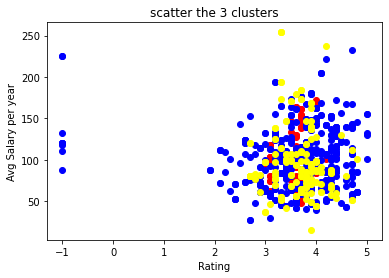

In [ ]:
#Affichier les trois clusters

# Supervised learning : 

In [52]:
#df.iloc[:,1:4]
df1.select_dtypes('float')

,Rating,avg_salary,same_state,age,seniority,num_comp,Sum_ab,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na
0,3.8,72.0,0.0,47.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.4,87.5,0.0,36.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.8,85.0,1.0,10.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.8,76.5,1.0,55.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.9,114.5,1.0,22.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,84.5,0.0,190.0,2.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
738,4.4,102.5,0.0,14.0,2.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
739,2.6,73.5,1.0,36.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740,3.2,127.5,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
#le  target de notre modele sera Avg Salary  , les autres ne nous sont pas utilie 
df1.shape

(742, 15)

In [55]:
# changement de l'emplacement de la column target 
col = df1.pop("avg_salary")
df1.insert(df1.shape[1] ,col.name,col)
df1.head()

,Rating,same_state,age,seniority,num_comp,Sum_ab,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,cluster,avg_salary
0,3.8,0.0,47.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,72.0
1,3.4,0.0,36.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,87.5
2,4.8,1.0,10.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,85.0
3,3.8,1.0,55.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,76.5
4,2.9,1.0,22.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,114.5


In [59]:
features = df1.iloc[:,:14]
#features = features.drop(columns='Clust')
features

,Rating,same_state,age,seniority,num_comp,Sum_ab,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,cluster
0,3.8,0.0,47.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,3.4,0.0,36.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,4.8,1.0,10.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,3.8,1.0,55.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,2.9,1.0,22.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,0.0,190.0,2.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
738,4.4,0.0,14.0,2.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
739,2.6,1.0,36.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
740,3.2,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [58]:
Target = df1.iloc[:,-1]
Target

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: avg_salary, Length: 742, dtype: float64

In [60]:
#import !!
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [61]:
X_train ,X_test , Y_train ,Y_test = train_test_split(features,Target,train_size=0.8,random_state=10)

In [69]:
#declaration du model 
ANN = Sequential()
ANN.add(layers.Dense(64,input_dim=14,activation='relu'))
ANN.add(layers.Dense(128,activation='relu'))
ANN.add(layers.Dense(128,activation='relu'))
ANN.add(layers.Dense(128,activation='relu'))
ANN.add(layers.Dense(64,activation='relu'))
ANN.add(layers.Dense(64,activation='relu'))
ANN.add(layers.Dense(64,activation='relu'))
ANN.add(layers.Dense(1))

In [70]:
#visualise the N.N
from keras.utils.vis_utils import plot_model
plot_model(ANN,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [71]:
from sklearn import metrics
#Compile model 
ANN.compile(loss="MSE",metrics='mae')

In [72]:
#model training
Hist = ANN.fit(X_train,Y_train,epochs=600)

Epoch 1/600


2023-03-01 14:11:11.113004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 29ms/step - loss: 7543.3110 - mae: 74.9557
Epoch 2/600
19/19 [==============================] - 0s 12ms/step - loss: 3636.9426 - mae: 46.9115
Epoch 3/600
19/19 [==============================] - 0s 12ms/step - loss: 1574.0240 - mae: 29.6343
Epoch 4/600
19/19 [==============================] - 0s 12ms/step - loss: 1872.9100 - mae: 32.3081
Epoch 5/600
19/19 [==============================] - 0s 12ms/step - loss: 1230.7300 - mae: 26.3231
Epoch 6/600
19/19 [==============================] - 0s 12ms/step - loss: 1301.3364 - mae: 26.9469
Epoch 7/600
19/19 [==============================] - 0s 12ms/step - loss: 1511.2319 - mae: 27.2147
Epoch 8/600
19/19 [==============================] - 0s 12ms/step - loss: 1045.0588 - mae: 23.1778
Epoch 9/600
19/19 [==============================] - 0s 12ms/step - loss: 1229.2697 - mae: 25.5480
Epoch 10/600
19/19 [==============================] - 0s 12ms/step - loss: 913.6362 - mae: 22.2280
Epoch 11/600
19/19 [==

<Axes: >

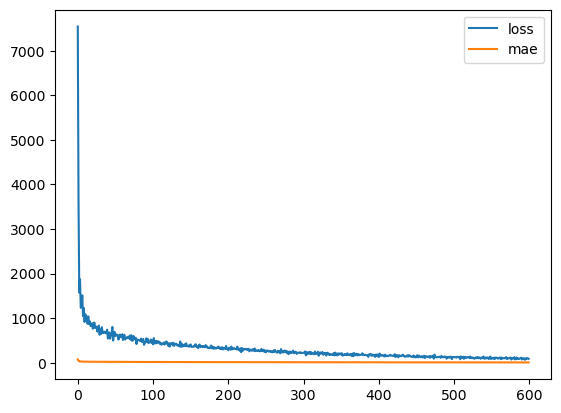

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(Hist.history).plot()

In [74]:
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                960       
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)               

In [75]:
ANN.evaluate(X_train,Y_train)

11/19 [================>.............] - ETA: 0s - loss: 72.2492 - mae: 5.4201

2023-03-01 14:16:06.534810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 7ms/step - loss: 78.7845 - mae: 5.6552


[78.78449249267578, 5.655234336853027]

5/5 [==============================] - 0s 12ms/step


2023-03-01 14:16:13.173324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<Axes: xlabel='Reel', ylabel='Prediction'>

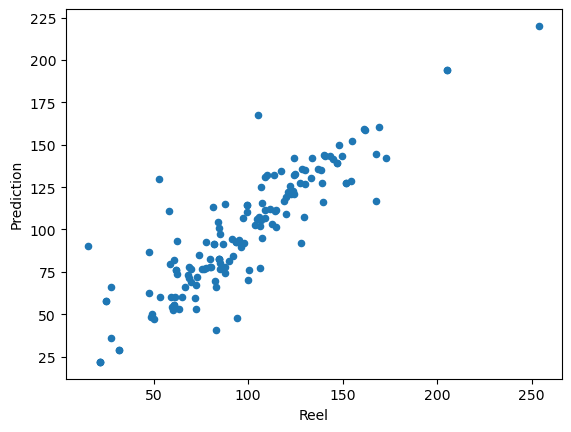

In [76]:
Y_pred = ANN.predict(X_test)
Tuples = list(zip(Y_test,Y_pred[:,0]))

df_pd = pd.DataFrame(Tuples,columns=['Reel','Prediction'])
df_pd.plot.scatter(x='Reel',y='Prediction')

In [77]:
ANN.save("model1.h5")

In [78]:
features.columns

Index(['Rating', 'same_state', 'age', 'seniority', 'num_comp', 'Sum_ab',
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'cluster'],
      dtype='object')

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
ln = LinearRegression()
ln.fit(X_train,Y_train)
linear_prediction = ln.predict(X_test)

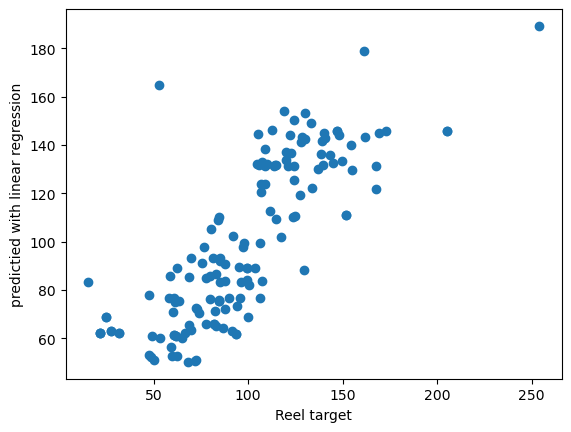

In [81]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, linear_prediction)
plt.xlabel("Reel target")
plt.ylabel("predictied with linear regression")
plt.show()


In [82]:
from sklearn.metrics import mean_squared_error as mse

In [83]:
acc = mse(y_true=Y_test,y_pred=linear_prediction)
acc

574.6704963539472

In [84]:
acc_ann = mse(Y_test ,Y_pred)
acc_ann

345.3595889093606

on peut conclure que l'ann  est  plus performant et  precis lors de sa prediction du salaire des differents informaticien